In [1]:
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

## Importazione dataset mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


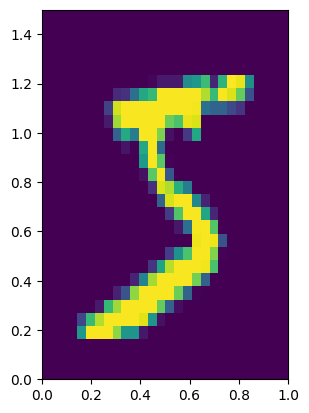

In [3]:
plt.imshow(x_train[0], extent=(0,1,0,1.5))

## Reshape del dataset in bidimensionalita perche keras si aspetta un vettore con 3 parametri e normalizzazione del dataset di test e di train  

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train/255
x_test = x_test/255

## Codifica one-hot alle etichette con keras

In [18]:


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(x_train[0].shape)

(60000, 10, 2) (10000, 10, 2)
(28, 28, 1)


## Creazione modello CNN con :
* 64 e 32 filtri 
* kernel 3 * 3 * 3
* funzione di attivazione = relu

* Flatten per appiattire i dati di output della Conv2D e darli al Dense 
* funzione di attivazione del Dense = softmax 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model= Sequential()

model.add(
    Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        input_shape=(28, 28, 1)
    )
)

model.add(
    Conv2D(
        32,
        kernel_size=3,
        activation = 'relu'
    )
)

model.add(
    Flatten()
)

model.add(
    Dense(
        units=10,
        activation = 'softmax'
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilazione modello
* Ottimizzatore
* Funzione di costo 
* Metrica 

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Addestramento 

In [10]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 144s 76ms/step - loss: 0.1261 - accuracy: 0.9622 - val_loss: 0.0592 - val_accuracy: 0.9810
Epoch 2/4
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0421 - val_accuracy: 0.9858
Epoch 3/4
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 4/4
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0440 - val_accuracy: 0.9869


## Risultati dell'addestramento del modello con illustrazione 

In [11]:
test_score = model.evaluate(x_test, y_test)
print(test_score)
print(model.metrics_names)
print('test metrics: {} {:.4f}, {} {:.2f}%'.format(
    model.metrics_names[0],
    test_score[0],
    model.metrics_names[1],
    test_score[1] * 100
) 
     )

313/313 [==============================] - 5s 17ms/step - loss: 0.0440 - accuracy: 0.9869
[0.04399453103542328, 0.9868999719619751]
['loss', 'accuracy']
test metrics: loss 0.0440, accuracy 98.69%


loss
accuracy
val_loss
val_accuracy


Text(0, 0.5, 'loss')

C:\Users\claud\Desktop\Python\venv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 11 () missing from current font.
  func(*args, **kwargs)
C:\Users\claud\Desktop\Python\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


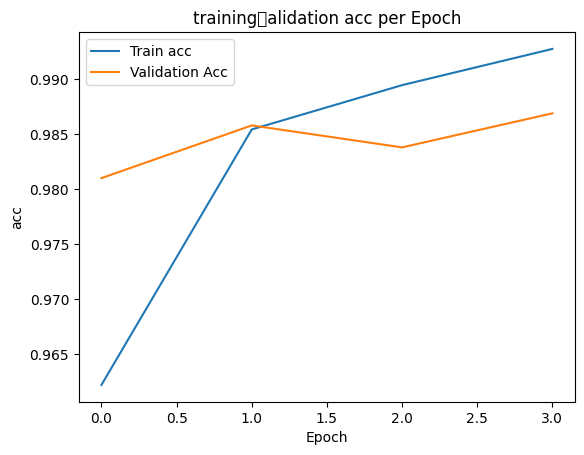

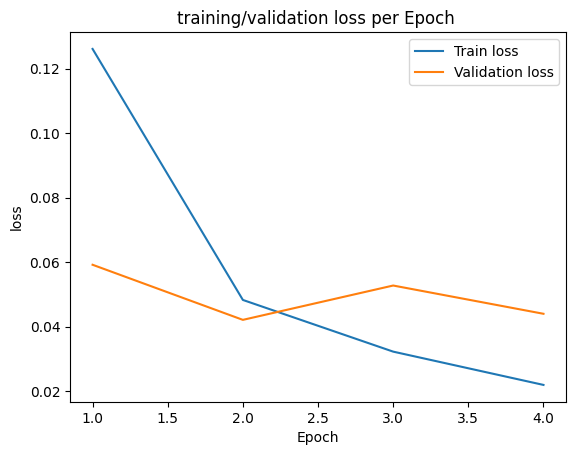

In [12]:
 for i in history.history:
    print(i)
    
f, ax=plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

ax.legend(['Train acc', 'Validation Acc'], loc = 0)
ax.set_title('training\validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

f2, ax2 = plt.subplots()
ax2.plot([None] + history.history['loss'])
ax2.plot([None] + history.history['val_loss'])
ax2.legend(['Train loss', 'Validation loss'], loc=0)
ax2.set_title('training/validation loss per Epoch ')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('loss')

## Visualizzazione dati di test e dei valori predetti per i primi 100 elementi

In [17]:
prediction = model.predict(x_test[0:100])
print(prediction.shape)

classes = np.argmax(prediction, axis =1 )
print(classes)

length = 100
succes = 0

for i in range(0, len(classes)):
    print('Prediction ->', classes[i])
    print("Label      -> ", np.argmax(y_test[i]))
    print("\n")
    
    if classes[i] == np.argmax(y_test[i]):
        succes = succes +1 
    
print("Predizioni totali: {} su {} ({}%)".format(success, length, success/length*100))

4/4 [==============================] - 0s 10ms/step
(100, 10)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 5 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
Prediction -> 7
Label      ->  7


Prediction -> 2
Label      ->  2


Prediction -> 1
Label      ->  1


Prediction -> 0
Label      ->  0


Prediction -> 4
Label      ->  4


Prediction -> 1
Label      ->  1


Prediction -> 4
Label      ->  4


Prediction -> 9
Label      ->  9


Prediction -> 5
Label      ->  5


Prediction -> 9
Label      ->  9


Prediction -> 0
Label      ->  0


Prediction -> 6
Label      ->  6


Prediction -> 9
Label      ->  9


Prediction -> 0
Label      ->  0


Prediction -> 1
Label      ->  1


Prediction -> 5
Label      ->  5


Prediction -> 9
Label      ->  9


Prediction -> 7
Label      ->  7


Prediction -> 3
Label      ->  3


Prediction -> 4
Label      ->  4


Prediction -> 9
Label      ->  9

